In [1]:
# Nama     : Waskito Aji
# Email    : waskitoaji46@gmail.com
# whatsapp : 085726255745

# Create database of Mall Customers

In [2]:
import sqlite3
import pandas as pd
conn= sqlite3.connect('customer.db')
c = conn.cursor()
customer= pd.read_csv("Pelanggan Mall.csv")
customer.to_sql('MallCustomer', conn, if_exists='replace',index=False)

C:\Users\USER\miniconda3\envs\jcop_usl\lib\site-packages\pandas\core\generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


# Load Mall Customers data from database

In [3]:
dfx=pd.read_sql('select * from MallCustomer', conn)
dfx.tail()

,Pelanggan,Jenis Kelamin,Usia,Pendapat Tahunan (Juta Rupiah),Nilai Pengeluaran (1-100)
195,196,Female,35,1200.0,79
196,197,Female,45,1260.0,28
197,198,Male,32,1260.0,74
198,199,Male,32,1370.0,18
199,200,Male,30,1370.0,83


In [4]:
dfx.shape

(200, 5)

# Preprocessing

## Removing missing value

In [5]:
dfx=dfx.dropna()
dfx.shape

(198, 5)

## Processing categorical data

In [6]:
#encoding the gender, 0 for male and 1 for female
dfx['Jenis Kelamin'] = dfx['Jenis Kelamin'].map({'Male': 0,'Female': 1})
dfx['Jenis Kelamin'].value_counts()

1    111
0     87
Name: Jenis Kelamin, dtype: int64

In [7]:
dfx.head()

,Pelanggan,Jenis Kelamin,Usia,Pendapat Tahunan (Juta Rupiah),Nilai Pengeluaran (1-100)
0,1,0,19,150.0,39
1,2,0,21,150.0,81
2,3,1,20,160.0,6
3,4,1,23,160.0,77
4,5,1,31,170.0,40


# Exploratory Data Analysis

In [8]:
dfx.describe()

,Pelanggan,Jenis Kelamin,Usia,Pendapat Tahunan (Juta Rupiah),Nilai Pengeluaran (1-100)
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,99.803030,0.560606,38.873737,602.979798,50.161616
std,57.750879,0.497571,14.033290,262.666355,25.620505
min,1.000000,0.000000,18.000000,150.000000,1.000000
25%,50.250000,0.000000,28.250000,405.000000,35.000000
50%,99.500000,1.000000,36.000000,610.000000,50.000000
75%,148.750000,1.000000,49.000000,777.500000,72.750000
max,200.000000,1.000000,70.000000,1370.000000,99.000000


## mengetahui sebaran data melalui histogram 

In [9]:
dfx['Jenis Kelamin'].value_counts().plot(kind='bar',title='Histogram jenis kelamin (0=male, 1=female)')

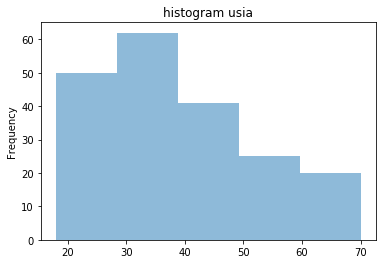

In [10]:
dfx['Usia'].plot.hist(bins=5, alpha=0.5,title='histogram usia')

In [11]:
dfx['Pendapat Tahunan (Juta Rupiah)'].nunique()

64

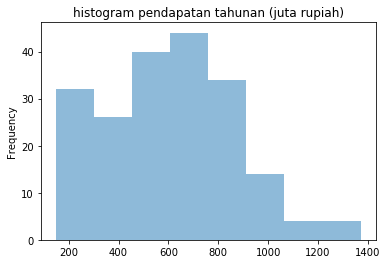

In [12]:
dfx['Pendapat Tahunan (Juta Rupiah)'].plot.hist(bins=8, alpha=0.5,title='histogram pendapatan tahunan (juta rupiah)')

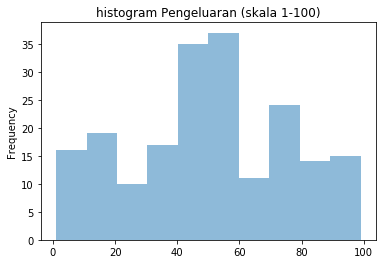

In [13]:
dfx['Nilai Pengeluaran (1-100)'].plot.hist(bins=10, alpha=0.5,title='histogram Pengeluaran (skala 1-100)')

## mengetahui hubungan antar data melalui scatter plot

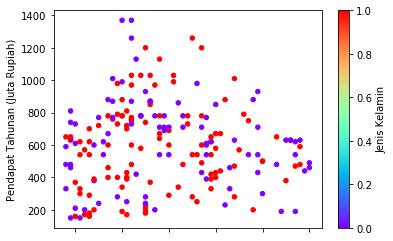

In [16]:
import matplotlib.pyplot as plt
dfx.plot.scatter(x='Usia',y='Pendapat Tahunan (Juta Rupiah)',c='Jenis Kelamin',cmap="rainbow")
plt.show()

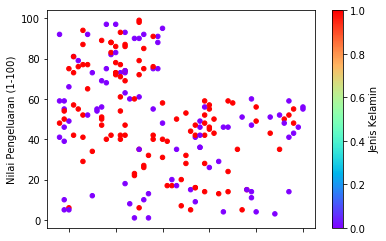

In [17]:
dfx.plot.scatter(x='Usia',y='Nilai Pengeluaran (1-100)',c='Jenis Kelamin',cmap="rainbow")
plt.show()

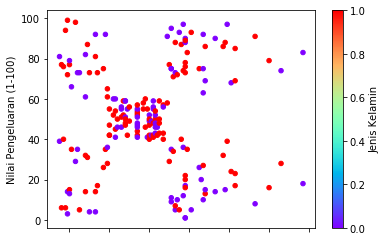

In [18]:
dfx.plot.scatter(x='Pendapat Tahunan (Juta Rupiah)',y='Nilai Pengeluaran (1-100)',c='Jenis Kelamin',cmap="rainbow")
plt.show()

# Clustering data dengan machine learning

In [19]:
dfx.head()

,Pelanggan,Jenis Kelamin,Usia,Pendapat Tahunan (Juta Rupiah),Nilai Pengeluaran (1-100)
0,1,0,19,150.0,39
1,2,0,21,150.0,81
2,3,1,20,160.0,6
3,4,1,23,160.0,77
4,5,1,31,170.0,40


In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
X = dfx.values[:,2:]
X = np.nan_to_num(X)
Clus_dataSet = MinMaxScaler().fit_transform(X)
Clus_dataSet

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

# Defining N - cluster

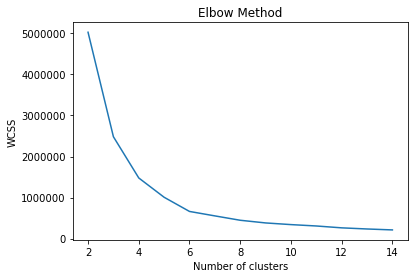

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
clusterNum = 6
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 10,max_iter=500)
k_means.fit(X)
labels = k_means.labels_

In [23]:
dfx["Clus_km"] = labels
dfx.head(5)

,Pelanggan,Jenis Kelamin,Usia,Pendapat Tahunan (Juta Rupiah),Nilai Pengeluaran (1-100),Clus_km
0,1,0,19,150.0,39,4
1,2,0,21,150.0,81,4
2,3,1,20,160.0,6,4
3,4,1,23,160.0,77,4
4,5,1,31,170.0,40,4


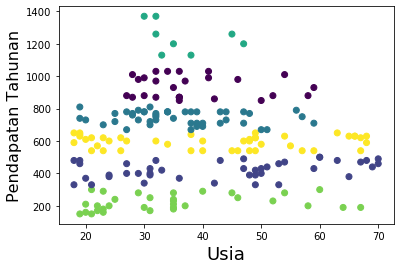

In [24]:
plt.scatter(X[:,0], X[:,1], c=labels.astype(np.float))
plt.xlabel('Usia', fontsize=18)
plt.ylabel('Pendapatan Tahunan', fontsize=16)
plt.show()

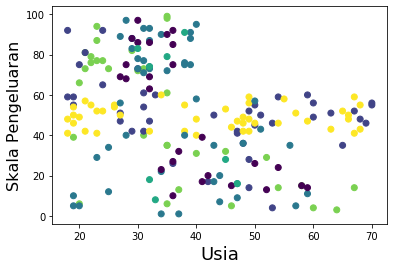

In [25]:
plt.scatter(X[:,0], X[:,2], c=labels.astype(np.float))
plt.xlabel('Usia', fontsize=18)
plt.ylabel('Skala Pengeluaran', fontsize=16)

plt.show()

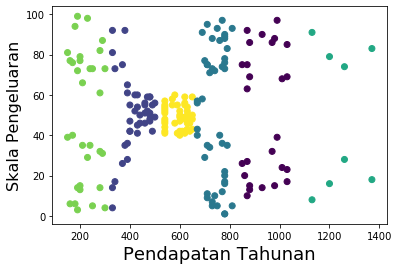

In [26]:
plt.scatter(X[:,1], X[:,2], c=labels.astype(np.float))
plt.xlabel('Pendapatan Tahunan', fontsize=18)
plt.ylabel('Skala Pengeluaran', fontsize=16)
plt.show()